In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
#checking how many customer leaves the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
# 0 for stays and 1 for leaves

In [9]:
df['Geography'].value_counts()
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
#drop unwanted columns

df.drop(columns =['RowNumber', 'CustomerId', 'Surname'], inplace = True)


In [11]:
#to check columns are dropped or not 
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first= True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
#I got some problem so I changed their values manually 
df['Geography_Germany'] = df['Geography_Germany'].replace({True: 1, False: 0})
df['Geography_Spain'] = df['Geography_Spain'].replace({True: 1, False: 0})
df['Gender_Male'] = df['Gender_Male'].replace({True: 1, False: 0})


/tmp/ipykernel_18/1553045680.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography_Germany'] = df['Geography_Germany'].replace({True: 1, False: 0})
/tmp/ipykernel_18/1553045680.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography_Spain'] = df['Geography_Spain'].replace({True: 1, False: 0})
/tmp/ipykernel_18/1553045680.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. T

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [16]:
x= df.drop(columns= ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 1)

In [17]:
x_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-08-18 06:31:52.041814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 06:31:52.042081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 06:31:52.217263: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim= 11))
model.add(Dense(1, activation='sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [24]:
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1315
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8358
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6658
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5722
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5190
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4924
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4808
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4572
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4479
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4426


In [25]:
#to see first layers weights and bias
model.layers[0].get_weights()

[array([[ 0.2570422 ,  0.15013105,  0.15343422],
        [-1.3975991 ,  1.4637629 ,  0.68538994],
        [ 0.17620999,  0.10982005,  0.01922791],
        [-0.39703333,  0.18676049,  0.70510644],
        [ 0.02280843, -0.16431093,  0.25877348],
        [ 0.09964474,  0.11924636,  0.0799019 ],
        [ 0.8589008 , -0.48734656, -0.44635868],
        [ 0.03016881,  0.2666772 , -0.14670338],
        [-0.4114244 ,  0.30184752,  0.74483275],
        [ 0.0983713 , -0.19190173,  0.07737067],
        [ 0.54643434, -0.16383569, -0.29839754]], dtype=float32),
 array([ 0.92467326, -0.673815  , -0.6933672 ], dtype=float32)]

In [26]:
#to see second layer weights and bais 
model.layers[1].get_weights()

[array([[-1.1012855 ],
        [ 0.49547365],
        [ 0.42482355]], dtype=float32),
 array([-1.0193977], dtype=float32)]

In [27]:
model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.15215042],
       [0.18064225],
       [0.16321763],
       ...,
       [0.11445259],
       [0.17387642],
       [0.329847  ]], dtype=float32)

In [28]:
#lets assume a thredshold 0.5
y_log = model.predict(x_test_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
import numpy as np
y_predictes = np.where(y_log>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictes)

0.7925

Now improve accuracy using another techiques or adding layes 

In [31]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim= 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [34]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6896 - loss: 0.6076 - val_accuracy: 0.7994 - val_loss: 0.4697
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4517 - val_accuracy: 0.8044 - val_loss: 0.4378
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.4297 - val_accuracy: 0.8044 - val_loss: 0.4254
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4204 - val_accuracy: 0.8094 - val_loss: 0.4134
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4049 - val_accuracy: 0.8250 - val_loss: 0.3989
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8263 - loss: 0.3896 - val_accuracy: 0.8313 - val_loss: 0.3829
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8430 - loss: 0.3700 - val_accuracy: 0.8450 - val_loss: 0.3661
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3644 - val_accu

In [35]:
#to see first layers weights and bias
model.layers[1].get_weights()

[array([[-0.7696285 , -0.44271573, -0.3666989 ,  0.6805044 ,  0.29889512,
         -0.21202013, -0.13940553,  0.14436816, -0.23787609,  0.46737194,
         -0.13224928],
        [ 0.16874266, -0.43451107, -0.38186863, -0.44808656,  0.77058655,
         -0.14418775, -0.6823418 ,  0.42770836,  0.2043862 , -0.11446445,
         -0.06388725],
        [ 0.36614943,  0.5608145 ,  0.59688807, -0.02137974, -0.20304373,
          0.06711268,  0.02566206,  0.62550473,  0.7240116 , -0.475953  ,
          0.47262815],
        [ 0.52626497,  0.17644745,  0.20968805, -0.4692183 , -0.5538036 ,
          0.45432064, -0.24956658,  0.320716  , -0.4730136 ,  0.22655542,
         -0.01471986],
        [ 0.26269427,  0.08316083, -0.23383574, -0.21309845, -0.18720806,
          0.6111188 ,  0.43550935,  0.48429096,  0.18296273, -1.1531397 ,
          0.0404469 ],
        [-0.03955122,  0.19584464,  0.3526427 , -0.43763393,  0.40128198,
          0.19040106, -0.9229244 , -0.02645279, -0.44133112,  0.0636459

In [36]:
 #to see first layers weights and bias
model.layers[1].get_weights()

[array([[-0.7696285 , -0.44271573, -0.3666989 ,  0.6805044 ,  0.29889512,
         -0.21202013, -0.13940553,  0.14436816, -0.23787609,  0.46737194,
         -0.13224928],
        [ 0.16874266, -0.43451107, -0.38186863, -0.44808656,  0.77058655,
         -0.14418775, -0.6823418 ,  0.42770836,  0.2043862 , -0.11446445,
         -0.06388725],
        [ 0.36614943,  0.5608145 ,  0.59688807, -0.02137974, -0.20304373,
          0.06711268,  0.02566206,  0.62550473,  0.7240116 , -0.475953  ,
          0.47262815],
        [ 0.52626497,  0.17644745,  0.20968805, -0.4692183 , -0.5538036 ,
          0.45432064, -0.24956658,  0.320716  , -0.4730136 ,  0.22655542,
         -0.01471986],
        [ 0.26269427,  0.08316083, -0.23383574, -0.21309845, -0.18720806,
          0.6111188 ,  0.43550935,  0.48429096,  0.18296273, -1.1531397 ,
          0.0404469 ],
        [-0.03955122,  0.19584464,  0.3526427 , -0.43763393,  0.40128198,
          0.19040106, -0.9229244 , -0.02645279, -0.44133112,  0.0636459

In [37]:
#to see second layers weights and bias
model.layers[2].get_weights()

[array([[ 0.94099164],
        [-0.75819165],
        [ 1.46811   ],
        [-0.81301373],
        [-0.726854  ],
        [-0.7153355 ],
        [ 1.4378539 ],
        [-0.11700666],
        [-0.8030198 ],
        [ 1.2187717 ],
        [-0.65387434]], dtype=float32),
 array([-0.15717], dtype=float32)]

In [38]:
#lets assume a thredshold 0.5
y_log = model.predict(x_test_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
import numpy as np
y_predictes = np.where(y_log>0.5,1,0)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictes)

0.863

In [41]:
#wee can see now the accuracy has been improved than last time(0.802) 

Now lets plot some graph for understanding 

In [42]:
import matplotlib.pyplot as plt 

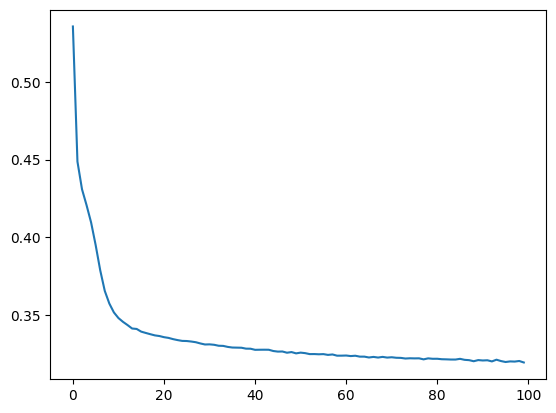

In [43]:
plt.plot(history.history['loss'])

In [44]:
#we can see that how loss going down 

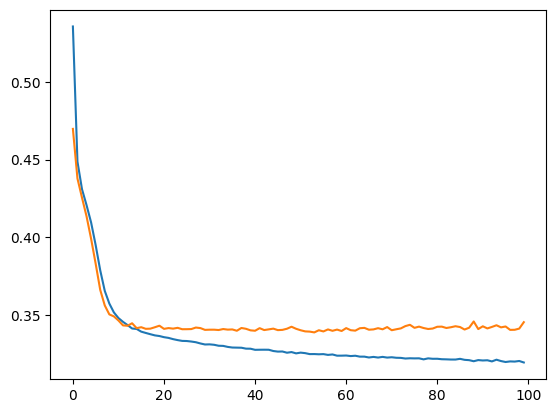

In [45]:
#we can see with val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

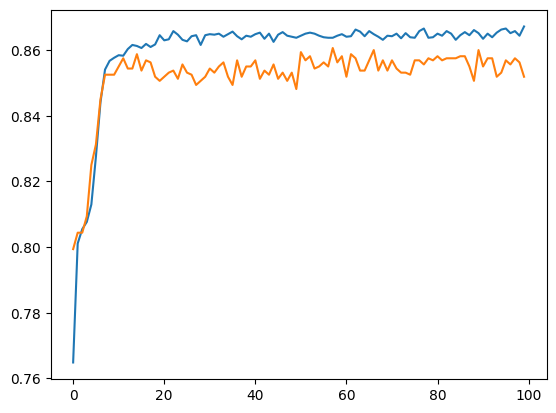

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])